# Assignment 1

## Solution for Problem 1 <font color='red' size=3>[10 points total]</font>

1. To find the minimum:
$$
\nabla F =
\begin{bmatrix}
\frac{\partial F}{\partial u_1} \\
\frac{\partial F}{\partial u_2} \\
\frac{\partial F}{\partial u_3}
\end{bmatrix} =
\begin{bmatrix}
6u_1+2u_2-6 \\
2u_1+6u_2+14 \\
2u_3 + 1
\end{bmatrix} = 0
$$
which gives
$$
\begin{align}
6u_1+2u_2 &= 6 \\
2u_1+6u_2 &= -14 \\
u_3 &= -0.5
\end{align}
$$
therefore, the only stationary point is $\mathbf{u}=\begin{bmatrix}2&-3&-0.5\end{bmatrix}^\top$.
Since
$$
\nabla^2F =
\begin{bmatrix}
6&2&0\\2&6&0\\0&0&2
\end{bmatrix}
$$
and $\lambda_i(\nabla^2F)=2,4,8$, then $\nabla^2F\succ0$ and the stationary point is a minimum.

<br>

| <font color='red'>Grading Issue</font>                                        | <font color='red'>Point Deduction</font> |
|-------------------------------------------------------------------|-----------------|
| incorrect problem set up (i.e., $\nabla F=0$)                     | -1              |
| incorrect minimizer (i.e., solving $\nabla F=0$ for $\mathbf{u}$) | -1              |
| did not show second-order condition for $\mathbf{u}$ as minimizer | -1              |

<br>

2. The Lagrangian is formed as $L=f+\lambda c_1$ and
$$
\nabla L =
\begin{bmatrix}
\frac{\partial L}{\partial u_1} \\
\frac{\partial L}{\partial u_2} \\
\frac{\partial L}{\partial u_3} \\
\frac{\partial L}{\partial \lambda} \\
\end{bmatrix} =
\begin{bmatrix}
6u_1+2u_2-6+2\lambda \\
2u_1+6u_2+14 + 3 \lambda \\
2u_3 + 1 + 4 \lambda \\
2u_1+3u_2+4u_3
\end{bmatrix} = 0
$$
which implies
$$
\begin{bmatrix}
6 & 2 & 0 & 2 \\
2 & 6 & 0 & 3 \\
0 & 0 & 2 & 4 \\
2 & 3 & 4 & 0
\end{bmatrix}
\begin{bmatrix}
u_1 \\ u_2 \\ u_3 \\ \lambda
\end{bmatrix} =
\begin{bmatrix}
6 \\ -14 \\ -1 \\ 0
\end{bmatrix}
$$
so that $\mathbf{u}=\begin{bmatrix}2.1355&-2.6839&0.9452\end{bmatrix}^\top$ and $\lambda=-0.7226$.

  As per notes, must look at $\mathbf{v}^\top L_{\mathbf{u}\mathbf{u}}\mathbf{v}$ where $\mathbf{v}$ is any vector in the constraint tangent space and
  $$
  L_{\mathbf{u}\mathbf{u}} =
  \begin{bmatrix} 6&2&0\\2&6&0\\0&0&2 \end{bmatrix} - 0.7226\times \mathbf{0},
  $$
  thus $L_{\mathbf{u}\mathbf{u}}\succ0$ as before, and this solution is a minimum.
    
<br>

| <font color='red'>Grading Issue</font>                                        | <font color='red'>Point Deduction</font> |
|--------------------------------------------------------------------------|-----------------|
| incorrect $\mathbf{u}$ and/or $\lambda$                                  | -1              |
| did not show condition for constrained minimizer ($L_\mathbf{uu}\succ0$) | -1              |

<br>

3. The Lagrangian is formed as $L=f+\lambda c_2$ and
$$
\nabla L =
\begin{bmatrix}
\frac{\partial L}{\partial u_1} \\
\frac{\partial L}{\partial u_2} \\
\frac{\partial L}{\partial u_3} \\
\frac{\partial L}{\partial \lambda} \\
\end{bmatrix} =
\begin{bmatrix}
6u_1+2u_2-6+ 4 \lambda (u_1 - u_2) \\
2u_1+6u_2+14 - 4 \lambda (u_1 - u_2) \\
2u_3 + 1 \\
2(u_1-u_2)^2-4
\end{bmatrix} = 0,
$$

which can be solved symbolically in Python using `sympy` as shown in the following code block:

In [3]:
import sympy
u1, u2, L = sympy.symbols('u1 u2 L')
g1 = (6 + 4 * L) * u1 + (2 - 4 * L) * u2 - 6
g2 = (2 - 4 * L) * u1 + (6 + 4 * L) * u2 + 14
g3 = 2 * (u1 - u2)**2 - 4
sol = sympy.solvers.solve((g1,g2,g3), (u1,u2,L), dict=True)
print(f"Number of solutions: {len(sol)}")
for s in sol:
    sympy.pprint(s)

Number of solutions: 2
⎧     1   5⋅√2        1   √2        √2   1⎫
⎨L: - ─ + ────, u₁: - ─ + ──, u₂: - ── - ─⎬
⎩     2    4          2   2         2    2⎭
⎧     5⋅√2   1        √2   1        1   √2⎫
⎨L: - ──── - ─, u₁: - ── - ─, u₂: - ─ + ──⎬
⎩      4     2        2    2        2   2 ⎭


To study the stationary points, note that

$$
L_{\mathbf{u}\mathbf{u}} =
\begin{bmatrix} 6&2&0\\2&6&0\\0&0&2 \end{bmatrix} + \lambda\begin{bmatrix} 4&-4&0\\-4&4&0\\0&0&0 \end{bmatrix},
$$

We must consider a $\mathbf{v}$ that solves $\mathbf{v}^\top \nabla c_2=0$, which gives $\mathbf{v} = \begin{bmatrix}v_2&v_2&v_3\end{bmatrix}^\top$, then

$$
\begin{align}
\lambda_1 &= 1.27 :\qquad & \mathbf{v}_1^\top L_\mathbf{uu}\mathbf{v}_1 = 16v_2^2+2v_3^2 > 0 \\
\lambda_2 &= -2.27 :\qquad & \mathbf{v}_2^\top L_\mathbf{uu}\mathbf{v}_2 = 16v_2^2+2v_3^2 > 0
\end{align}
$$

so both are local minima.

Note that $F(\mathbf{u}_1^*)=-14.4$ and $F(\mathbf{u}_2^*)=13.9$, so $\mathbf{u}_1^*=\begin{bmatrix}0.21 & -1.21 & -0.5\end{bmatrix}^\top$ is the global constrained minimizer.

<br>

| <font color='red'>Grading Issue</font>                                        | <font color='red'>Point Deduction</font> |
|-----------------------------------------------------------------------------|-----------------|
| did not find both solutions                                                 | -1              |
| did not discuss / show choices of $\mathbf{v}$ in constraint tangent space  | -1              |
| did not identify correct global minimizer                                   | -1              |


**[Not required]** Code for solving the unconstrained and constrained optimization problems is given below:

In [4]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint

def f(u):
    """The function f : R^3 -> R defined in Problem 1"""
    return 3*u[0]**2 + 2*u[0]*u[1] + 3*u[1]**2 + u[2]**2 - 6*u[0] + 14*u[1] + u[2]

# choose an initial condition (since this is a nonlinear optimization)
x0 = np.ones((3,))

# Unconstrained minimization
res = minimize(f, x0, method='bfgs', options={'disp': True})
print(f"The unconstrained minimum of f is {res.x}\n\n")

# Constrained minimization 1 : linear constraint
c1_A = np.array([2., 3., 4.])
res = minimize(f, x0,
               constraints=LinearConstraint(c1_A, lb=0, ub=0),
#                method='trust-constr',
               options={'disp': True})
print(f"The linear equality-constrained minimum of f is {res.x}\n\n")

# Constrained minimization 2 : nonlinear constraint
c2 = lambda u: 2*(u[0]-u[1])**2 - 4
res = minimize(f, x0,
               constraints=NonlinearConstraint(c2, lb=0, ub=0),
#                method='trust-constr',
               method='SLSQP',
               options={'disp': True})
print(f"The nonlinear equality-constrained minimum of f is {res.x}\n\n")

Optimization terminated successfully.
         Current function value: -27.250000
         Iterations: 7
         Function evaluations: 40
         Gradient evaluations: 8
The unconstrained minimum of f is [ 1.99999974 -3.00000041 -0.49999649]


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -24.72096754560517
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6
The linear equality-constrained minimum of f is [ 2.13555951 -2.6836749   0.94497642]


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -14.392135575072098
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9
The nonlinear equality-constrained minimum of f is [ 0.20718305 -1.20703051 -0.49998366]




## Solution for Problem 2 <font color='red' size=3>[10 points total]</font>

1. $\mathbf{p} = -\mathbf{g} = -\nabla F = -\begin{bmatrix}2x_1-x_2-2\\ 2x_2-x_1-x_3\\ 2x_3-x_2-8\end{bmatrix}$

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect search direction             | -1                                       |

<br>

2. With $\mathbf{x}_0=\begin{bmatrix}1&1&-1\end{bmatrix}^\top$, $\mathbf{p}=-\begin{bmatrix}-1\\2\\-11\end{bmatrix}$ so that $\mathbf{x}_1=\begin{bmatrix}1+\alpha\\1-2\alpha\\-1+11\alpha\end{bmatrix}$

  Substitute into $F$ to get

  $$
  \begin{align}
  \tilde{F}(\alpha) &= (1+\alpha)^2 + (1-2\alpha)^2 + (-1+11\alpha)^2 - (1+\alpha)(1-2\alpha) - (1-2\alpha)(1+7\alpha) - 2(1+\alpha) - 8(-1+11\alpha) \\
  &= 150\alpha^2 - 126\alpha + 9
  \end{align}
  $$
  
  now for $\frac{\partial \tilde{F}}{\partial\alpha}=300\alpha-126=0$ giving the optimal step size $\alpha^*=0.42$.

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect $\mathbf{x}_1$               | -1                                       |
| incorrect $\alpha_0$                   | -1                                       |

<br>


3. See code below

| <font color='red'>Grading Issue</font>              | <font color='red'>Point Deduction</font> |
|-----------------------------------------------------|------------------------------------------|
| Gradient descent takes many more than 35 iterations | -1                                       |
| incorrect minimizer from gradient descent algorithm | -1                                       |
| missing comparison with `scipy.optimize.minimize`   | -1                                       |

In [9]:
def satisfies_wolfe_condit(F, x, p, g, α):
    """
    Check for satisfaction of Wolfe conditions 
    
    Parameters
    ----------
    F : function
        the function being minimized
    x : np.array
        the current iterate, i.e., current guess of minimum
    p : np.array
        search direction
    g : function
        the gradient of the function
    α : float
        step size to move in 
        
    Returns
    -------
    cond : bool
           whether or not the Wolfe conditions are satisfied
    """
    c1 = 1e-4;
    c2 = 0.9;

    cond1 = F(x + α*p) <= F(x) + c1*α*np.dot(p, g(x));
    cond2 = -np.dot(p.T, g(x + α*p)) <= -c2*np.dot(p, g(x))
    cond = (cond1 and cond2)
    return cond

def bracketing_line_search(F, x, p, g, Del=0.4):
    """
    Line search for determining step size via bracketing
    
    Parameters
    ----------
    F : function
        the function being minimized
    x : np.array
        the current iterate, i.e., current guess of minimum
    p : np.array
        search direction
    g : function
        the gradient of the function
    Del : float
        arbitrary interval size for bracket
        
    Returns
    -------
    α : float
        step size to move in   
    """
    MAX_BRACKET_ITERS = 100
    
    β = 1 # interval length
    a0 = 0 # starting point
    b0 = a0 + β*Del # ending of first bracket
    
    # Determine which direction to search
    Fa = F(x + a0*p)
    Fb = F(x + b0*p)
    if Fb > Fa:
        # search opposite direction
        Del = -Del

        # recalculate end of bracket and objective value
        # at the end of the first bracket
        b0 = a0 + Del
        Fb = F(x + b0*p)

    # Actual bracketing happens here
    a = a0
    b = b0
    for i in range(MAX_BRACKET_ITERS):
        β = β * 1.25 # make interval length larger

        # go to next bracket
        anext = b
        bnext = anext + β*Del

        # objective value at start and end of bracket
        Fa = F(x + anext*p)
        Fb = F(x + bnext*p)

        if Fb > Fa:
            b = bnext
            break
            
        # commit to next bracket
        a = anext
        b = bnext
    
    #Select α by sampling in the bracket found, and checking the Wolfe conditions
    α_chosen = None
    for α in np.linspace(a,b,10).tolist():
        if(satisfies_wolfe_condit(F, x, p, g, α)):
            α_chosen = α

    if(α_chosen==None):
        α_chosen=(a + b)/2 # pick midpoint of bracket as step size
            
    return α_chosen
    

def steepest_descent(x0, F, g):
    """
    Steepest descent via gradient search
    
    Parameters
    ----------
    x0 : np.array
        initial condition
    F : function
        objective function to minimize
    g : function
        gradient of objective function
        
    Returns
    -------
    x : np.array
        minimum
    obj : float
        objective value at minimum
    iters : int
        number of iterations required to converge
    """
    
    xnew = x0
    
    MAX_GRAD_ITERS = 100
    TOL = 1e-9
    
    for i in range(MAX_GRAD_ITERS):
        x = xnew

        # Choose descent direction
        p = -g(x)
        
        # Perform a line search to identify the best step size
        α = bracketing_line_search(F, x, p, g)
        
        # move along descent direction with step size determined by bracketing
        xnew = x + α*p
        
        # check convergence---have we stopped moving?
        if (np.linalg.norm(xnew - x) < TOL) or (abs(F(xnew)-F(x)) < TOL):
            break
        
    return x, F(x), i

In [10]:
# define problem data
F = lambda x: x[0]**2 + x[1]**2 + x[2]**2 - x[0]*x[1] - x[1]*x[2] - 2*x[0] - 8*x[2]
g = lambda x: np.array([2*x[0] - x[1] - 2, 2*x[1] - x[0] - x[2], 2*x[2] - x[1] - 8])

# choose initial condition
x0 = np.ones((3,))

# custom gradient descent solver
xopt, obj, iters = steepest_descent(x0, F, g)
print(f"GD minimizer after {iters} iterations: {xopt}")

# BFGS solver
bfgs_sol = minimize(F, x0, method='bfgs', options={'disp': False})
print(f"BFGS minimizer after {bfgs_sol.nit} iterations: {bfgs_sol.x}")

GD minimizer after 35 iterations: [3.50000244 4.9999646  6.50000244]
BFGS minimizer after 8 iterations: [3.49999383 4.99999395 6.49999778]


## Solution for Problem 3 <font color='red' size=3>[10 points total]</font>

1. Form Lagrangian $L(x,y,\boldsymbol{\lambda})=F(x,y)+\lambda_1 f_1 + \lambda_2 f_2$ giving (form so $f_i\le0$)

  $$
  L = x^2 + y^2 - 18xy -4x -5y + \lambda_1(y+x^2-4) + \lambda_2(-x-y-1).
  $$

  From necessary conditions,

  $$
  \begin{align}
  \frac{\partial L}{\partial x} \;&=\; 2x - 18y - 4 + \lambda_1(2x) - \lambda_2 = 0 \\
  \frac{\partial L}{\partial y} \;&=\; 2y - 18x - 5 + \lambda_1(1) + \lambda_2(-1) = 0 \\
  \lambda_1 \frac{\partial L}{\partial \lambda_1} \;&=\; \lambda_1(y+x^2-4) = 0 \\
  \lambda_2 \frac{\partial L}{\partial \lambda_2} \;&=\; \lambda_2(-x-y-1) = 0\\
  \end{align}
  $$

  Three main cases to consider here---the corner cases with 2 intersections can be checked explicitly as cases 4 and 5, or you can just check that assumptions of which constraints are active (or not) at the stationary points are correct.
  
  **(i)** Assume $\lambda_1=\lambda_2=0$, then
  
  $$
  \begin{bmatrix}2x-18y-4 \\ 2y-18x-5\end{bmatrix} = 0
  $$
  
  giving $x=-0.3063$ and $y=-0.2562$. Note that $\nabla^2 L= \begin{bmatrix}2 & -18 \\ -18  & 2\end{bmatrix}$ and $\lambda_i(\nabla^2 L)=-16, 20$, so a saddle point (and none of the constraints are active).

  **(ii)** Now assume $\lambda_1\ge0$ but $\lambda_2=0$, then
  $$
  \begin{bmatrix}2x-18y-4+2x\lambda_1 \\ 2y-18x-5 + \lambda_1 \\ y + x^2 - 4\end{bmatrix} = 0
  $$
  then solve for expression in $x$ only, giving
  
  $$
  2x-18(4-x^2)-4+2x(-2(4-x^2)+18x+5)=0
  $$
  
  with 3 roots $-13.4695, -1.2030, 1.1725$. Three cases to consider are
  
  $$
  \mathbf{m}_1=\begin{bmatrix} -13.4695 \\ -177.4279 \\   117.4045\end{bmatrix},\;
  \mathbf{m}_2=\begin{bmatrix} -1.2030 \\ 2.5527 \\   -21.7599 \end{bmatrix},\;
  \mathbf{m}_3=\begin{bmatrix} 1.1725 \\ 2.6252 \\   20.8554 \end{bmatrix}
  $$
  
  note that only $\mathbf{m}_1$ and $\mathbf{m}_3$ have $\lambda_1 > 0$ as assumed, but $\mathbf{m}_1$ violates $f_2$ since $-117.4279 < 13.4695 -1$.
  
  To consider second order conditions, we must look at $\mathbf{v}^\top L_{xx} \mathbf{v}>0$ where $\mathbf{v}$ must satisfy $\mathbf{v}^\top\begin{bmatrix}2x\\1\end{bmatrix}=0$. Associated with $\mathbf{m}_3$ we have $\mathbf{v}^\top\begin{bmatrix}2.345\\1\end{bmatrix}=0$.
  Now $L_{xx} = \begin{bmatrix}2&-18\\-18&2\end{bmatrix} + \lambda_1\begin{bmatrix}2&0\\0&0\end{bmatrix}$.
  Thus, for $\mathbf{m}_3$ we have
  
  $$
  \begin{bmatrix}1&-2.345\end{bmatrix}\begin{bmatrix}2+2(20.8554)&-18\\-18&2\end{bmatrix} 
  \begin{bmatrix}1\\-2.345\end{bmatrix} = 139 > 0,
  $$
  
  so it is a minimum. Note that $F(1.1725,2.6252)=-64.9544$. Furthermore, the original assumptions on the Lagrange multipliers are valid.
  
  **(iii)** Now assume $\lambda_2 \geq 0$ but $ \lambda_1=0$, then
  $$
  \begin{bmatrix}2x-18y-4 - \lambda_2 \\ 2y-18x-5 - \lambda_2 \\ (-x -y -1)\end{bmatrix} = 0
  $$
  which yields
  $$
  \mathbf{m} = \begin{bmatrix}-0.5250 \\ -0.4750 \\ 3.500\end{bmatrix}
  $$
  but note that $F(-0.5250,-0.4750)=0.4875$ which is higher for the case in (ii), so we know that this cannot be the lowest min (even if it was a min).
  
  **(iv)** If you hadn't considered the validity of the assumptions on which the constraint is active or not above, you could also consider the corner cases---look for intersections of $f_1$ and $f_2$, which give
  $$
  \mathbf{x}_{i1} = \begin{bmatrix}2.7913 \\ -3.7913\end{bmatrix},\qquad
  \mathbf{x}_{i2} = \begin{bmatrix}-1.7913 \\ 0.79129\end{bmatrix}
  $$
  
  but $F(\mathbf{x}_{i1})=220.4428$ and $F(\mathbf{x}_{i2})=32.5572$, so these aren't in the running for the min.
  
  So the min is with $f_1$ active, yielding solution $x=1.1725$, $y=2.6252$, and $\lambda_1=20.8554$ with $F(1.1725,2.6252)=-64.9544$.


<br>

| <font color='red'>Grading Issue</font>                    | <font color='red'>Point Deduction</font> |
|-----------------------------------------------------------|------------------------------------------|
| for each missing or incorrect case (should be four cases) | -1 (up to -4)                            |
| incorrect minimizer                                       | -1                                       |

<br>

2. From notes, $\frac{\partial F}{\partial c}=-\lambda$ where we are changing $y+x^2-4\le0$ to $y+x^2-4\le0.1$. Thus we estimate that

  $$
  dF \approx -20.8554(0.1) = -2.0855
  $$
  and
  $$
  dF_\text{actual} = -2.0940
  $$

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect / missing discussion         | -1                                       |

<br>
    
3. Code given below

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| missing code or incorrect result | -2                                       |

<br>

4. When maximized, both Lagrange multipliers are non-zero because both constraints become active.

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect / missing discussion or code | -1                                       |

<br>

Optimization terminated successfully    (Exit mode 0)
            Current function value: -64.9553272930207
            Iterations: 9
            Function evaluations: 37
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: -64.9553440233222
            Iterations: 10
            Function evaluations: 30
            Gradient evaluations: 8


Lagrange multipliers : [array([20.85541822]), array([-2.29238334e-09])]


[Maximization] x*= : [ 2.79124818 -3.79120459], with Lagrange mult=[array([28.94689779]), array([91.77177434])]


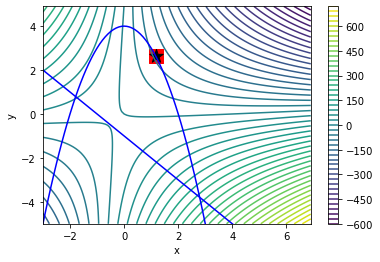

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

f = lambda x, y: x**2 + y**2 - 18*x*y - 4*x - 5*y
f1 = lambda x: -x**2 + 4 # >= y
f2 = lambda x: -x - 1 # <= y

X = np.arange(-3, 7, 0.1)
Y = np.arange(-5, 5, 0.1)
XX, YY = np.meshgrid(X, Y)
Z = f(XX,YY)

# plot function contours
plt.contour(XX, YY, Z, 50)
plt.colorbar()
plt.xlabel('x'); plt.ylabel('y')

# plot constraints
plt.plot(X, f1(X), 'b-')
plt.plot(X, f2(X), 'b-')
plt.axis([np.min(X), np.max(X), np.min(Y), np.max(Y)]);

# find constrained minimum - check with 2 ICs
c1 = NonlinearConstraint(lambda x: x[1] - f1(x[0]), lb=-np.inf, ub=0)
c2 = NonlinearConstraint(lambda x: f2(x[0]) - x[1], lb=-np.inf, ub=0)
x01 = np.ones((2,)) * 4 # initial condition 1
x02 = np.zeros((2,)) # initial condition 2
res1 = minimize(lambda x: f(x[0],x[1]), x01, constraints=[c1,c2], options={'disp': True})
res2 = minimize(lambda x: f(x[0],x[1]), x02, constraints=[c1,c2], options={'disp': True})

# plot two minima
plt.scatter(res1.x[0], res1.x[1], c='red', marker='s', s=200)
plt.scatter(res1.x[0], res1.x[1], c='k', marker='*', s=200)

with warnings.catch_warnings():
  warnings.simplefilter('ignore')
  # can retrieve Lagrange multipliers to check numerically using method='trust-constr'
  res3 = minimize(lambda x: f(x[0],x[1]), x01, constraints=[c1,c2], method='trust-constr')
  print(f"\n\nLagrange multipliers : {res3.v}")
  
  #Now we maximize the function to see what happens
  res4 = minimize(lambda x: -f(x[0],x[1]), x01, constraints=[c1,c2], method='trust-constr')
  print(f"\n\n[Maximization] x*= : {res4.x}, with Lagrange mult.={res4.v}")
  

Difference in minimizer: [-0.0162262  -0.06168498]
Cost difference estimate: -2.085541822165737
Cost difference actual: -2.093998936751049


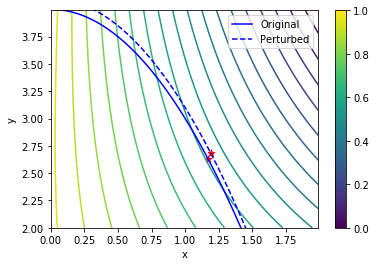

In [ ]:
# perturbed constraints
f1p = lambda x: -x**2 + 4.1 # >= y

# find constrained minimum
c1 = NonlinearConstraint(lambda x: x[1] - f1p(x[0]), lb=-np.inf, ub=0)
x0 = np.zeros((2,))
with warnings.catch_warnings():
  warnings.simplefilter('ignore')
  resp = minimize(lambda x: f(x[0],x[1]), x0, constraints=[c1,c2], method='trust-constr')

dx = res1.x - resp.x
print(f"Difference in minimizer: {dx}")

# cost difference estimate and actual
dF_est = -(np.array(res3.v).T @ np.array([0.1, 0]))[0]
dF_actual = resp.fun - res3.fun
print(f"Cost difference estimate: {dF_est}")
print(f"Cost difference actual: {dF_actual}")

# Plot contour and constraints with perturbation
X = np.arange(0, 2, 0.01)
Y = np.arange(2, 4, 0.01)
XX, YY = np.meshgrid(X, Y)
Z = f(XX,YY)
plt.contour(XX, YY, Z, 20)
plt.plot(X, f1(X), 'b-')
plt.plot(X, f1p(X), 'b--')
plt.scatter(res1.x[0], res1.x[1], c='r', marker='*', s=50)
plt.scatter(resp.x[0], resp.x[1], c='r', marker='*', s=50)
plt.colorbar()
plt.xlabel('x'); plt.ylabel('y')
plt.axis([np.min(X), np.max(X), np.min(Y), np.max(Y)]);
plt.legend(['Original','Perturbed']);

## Solution for Problem 4 <font color='red' size=3>[10 points total]</font>

1. Form Lagrangian (minimizing negative of the objective to maximize objective stated in the problem)

  $$
  L = -4(x+y) + \lambda(\frac{x^2}{a^2} + \frac{y^2}{b^2} - 2)
  $$
  
  and necessary conditions are
  
  $$
  \begin{align}
  \frac{\partial L}{\partial x} \;&=\; -4 + \lambda(2x/a^2) = 0 \\
  \frac{\partial L}{\partial y} \;&=\; -4 + \lambda(2y/b^2) = 0 \\
  \frac{\partial L}{\partial \lambda} \;&=\; \frac{x^2}{a^2} + \frac{y^2}{b^2} - 2 = 0
  \end{align}
  $$
  
  so $x\lambda=2a^2$ and $y\lambda=2b^2$ and
  
  $$
  \frac{(2a^2)^2}{\lambda^2a^2} + \frac{(2b^2)^2}{\lambda^2b^2} = 2
  $$
  
  and $\lambda = \pm\sqrt{2(a^2+b^2)}$, but it is clear that we must have $\lambda>0$ so that $x>0$ and $y>0$, so have solution
  
  $$
  x = \frac{2a^2}{\sqrt{2(a^2+b^2)}},\qquad
  y = \frac{2b^2}{\sqrt{2(a^2+b^2)}}
  $$
  
 Note that
  
  $$
  \nabla^2F = 0,\qquad
  \nabla^2f = \begin{bmatrix}2/a^2&0\\0&2/b^2\end{bmatrix}
  $$
  
  So must check that
  
  $$
  \mathbf{v}^\top\left(\nabla^2F + \lambda\nabla^2f\right)\mathbf{v} > 0
  $$
  
  for $\mathbf{v}$ such that $\mathbf{v}^\top\begin{bmatrix}\partial f/\partial x\\\partial f/\partial y\end{bmatrix}=0$ at any of the stationary points, but this is trivially true since $(\nabla^2F + \lambda\nabla^2f)>0$.

  <br>


| <font color='red'>Grading Issue</font>                          | <font color='red'>Point Deduction</font> |
|-----------------------------------------------------------------|------------------------------------------|
| incorrect choice of $\lambda$                                   | -1                                       |
| missing test (or at least discussion) of second-order condition | -1                                       |

2. Code below

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| missing code                           | -2                                       |

In [ ]:
from matplotlib.patches import Rectangle

def plot_rect_in_ellipse(a, b, r, x, y):
    """
    Plots a rectangle inscribed in an ellipse

    Parameters
    ----------
    a : float
      semi-major axis
    b : float
      semi-minor axis
    r : float
      axis scaling / 'radius' parameter
    x : float
      rectangle half width
    y : float
      rectangle half height
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.linspace(0, 2*np.pi, 100)
    ax.plot(r*a*np.cos(t), r*b*np.sin(t),'k--') # parametric ellipse eqn
    ax.add_patch(Rectangle((-x,-y), 2*x, 2*y, fill=False, ec='b', lw=2))
    ax.grid();
    ax.axis('equal')
    ax.set_title('Largest Rectangle Inscribed in Ellipse')
    ax.set_xlabel('x'); ax.set_ylabel('y');

     fun: -20.396078524660957
     jac: array([-4., -4.])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.56892815, 3.53009148])


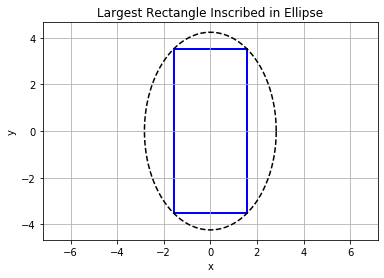

In [ ]:
# parameters from problem statement
a = 2
b = 3
r = np.sqrt(2.)

# objective and equality constraint equations
P = lambda x: 4*(x[0] + x[1])
ceq = lambda x: x[0]**2/a**2 + x[1]**2/b**2 - r**2

# note that using zeros as initial condition makes objective vanish
x0 = np.ones((2,)) # initial condition

# solve the problem, minimizing a negative objective to maximize as desired
sol = minimize(lambda x: -P(x), x0,
               constraints=NonlinearConstraint(ceq, lb=0, ub=0))
print(sol)

plot_rect_in_ellipse(a, b, r, sol.x[0], sol.x[1])

3. Code below

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| missing code                           | -2                                       |

In [ ]:
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("ipopt") or os.path.isfile("ipopt")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
    else:
        try:
            !conda install -c conda-forge ipopt 
        except:
            pass

assert(shutil.which("ipopt") or os.path.isfile("ipopt"))
from pyomo.environ import *

x = 1.5689, y = 3.5301
Perimeter = 20.3961


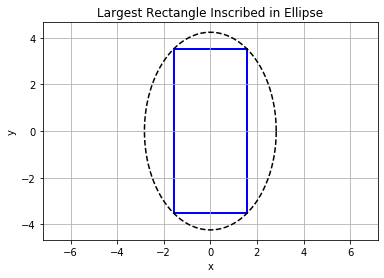

In [ ]:
import pyomo.environ as pe

# parameters from problem statement
a = 2
b = 3
r = np.sqrt(2.)

m = pe.ConcreteModel()

# create the decision variables
m.x = pe.Var(domain=pe.NonNegativeReals)
m.y = pe.Var(domain=pe.NonNegativeReals)

# create the objective function
m.P = pe.Objective(expr=4*(m.x + m.y), sense=pe.maximize)

# incscribed in ellipse constraint
m.c = pe.Constraint(rule=lambda m: m.x**2/a**2 + m.y**2/b**2 == r**2)

# solve the model using the nonlinear solver IPOPT ("eye-pea-opt")
pe.SolverFactory('ipopt').solve(m)

print(f'x = {m.x():.4f}, y = {m.y():.4f}')
print(f'Perimeter = {m.P():.4f}')

plot_rect_in_ellipse(a, b, r, m.x(), m.y())

## Solution for Problem 5 <font color='red' size=3>[10 points total]</font>



Control cost=26.589389808401688
Terminal cost=5.40149979113759e-06


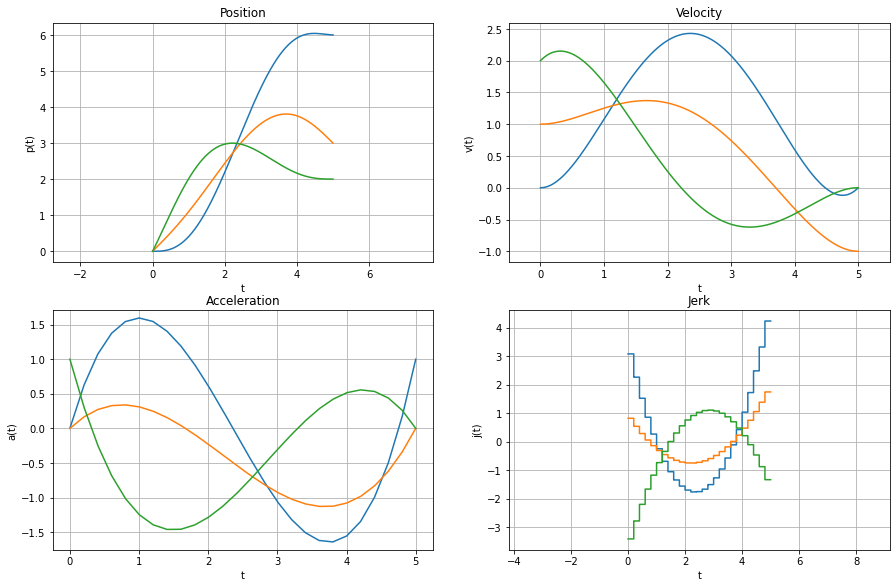

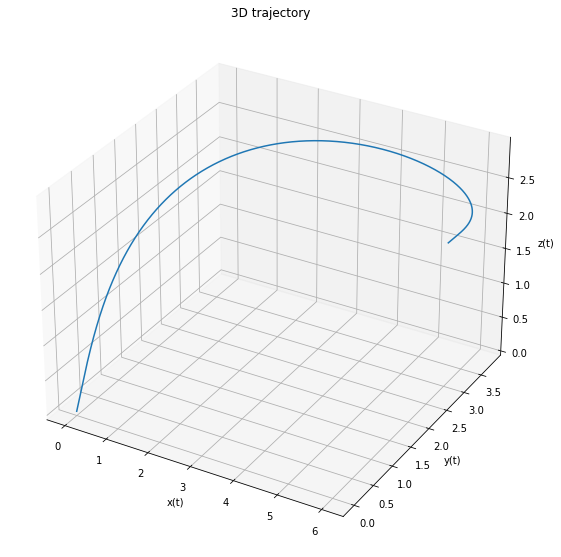

In [33]:
import pyomo.environ as pe
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

def getCoeff(seg, dim, coeff):
   return coeff[seg, dim, 0], coeff[seg, dim, 1], coeff[seg, dim, 2], coeff[seg, dim, 3]

def pos(seg, dim, coeff, τ):
   e,f,g,h=getCoeff(seg,dim,coeff)
   return e*(τ**3) + f*(τ**2) + g*(τ) +  h

def vel(seg, dim, coeff, τ):
   e,f,g,h=getCoeff(seg,dim,coeff)
   return 3*e*(τ**2) + 2*f*(τ) + g

def accel(seg, dim, coeff, τ):
   e,f,g,h=getCoeff(seg,dim,coeff)
   return 6*e*(τ) + 2*f

def jerk(seg, dim, coeff):
    e,f,g,h=getCoeff(seg,dim,coeff)
    return 6*e

S_dt=5.0; #Total time of the trajectory
S = 25 #Number of segments of the trajectory
dt=S_dt/S; #Total time spent per segment
omega=1000.0
init_pos=[0,0,0]
init_vel=[0,1,2]
init_accel=[0,0,1]

final_pos=  [6,3,2]
final_vel=  [0,-1,0]
final_accel=[1,0,0]

verbose=False

m = pe.ConcreteModel()
m.D_set = pe.RangeSet(0,2)       #Set that contains the indexes of the three Dimensions (x, y, z)
m.S_set = pe.RangeSet(0,S-1)     #Set that contains the indexes of the Segments of the trajectory
m.C_set = pe.RangeSet(0,3)       #Set that contains the indexes of the four Coefficients (e,f,g,h) of the cubic polynomial eτ^3 + fτ^2 + gτ+ h 

#Variables
m.coeff=pe.Var(m.S_set, m.D_set, m.C_set)

#Initial constraints
m.init_pos = pe.Constraint(m.D_set, rule = lambda m, dim: pos(0, dim, m.coeff, 0.0) == init_pos[dim])
m.init_vel = pe.Constraint(m.D_set, rule = lambda m, dim: vel(0, dim, m.coeff, 0.0) == init_vel[dim])
m.init_accel = pe.Constraint(m.D_set, rule = lambda m, dim: accel(0, dim, m.coeff, 0.0) == init_accel[dim])

#Final constraints
m.final_vel = pe.Constraint(m.D_set, rule = lambda m, dim: vel(S-1, dim, m.coeff, dt) == final_vel[dim])
m.final_accel = pe.Constraint(m.D_set, rule = lambda m, dim: accel(S-1, dim, m.coeff, dt) == final_accel[dim])

#Continuity constraints. Should impose them at the end of the segments 0, 1, ..., S-2
m.inter_S_set = pe.RangeSet(0,S-2)
m.cont_pos = pe.Constraint(m.D_set, m.inter_S_set, rule = lambda m, dim, seg: pos(seg, dim, m.coeff, dt) == pos(seg+1, dim, m.coeff, 0.0))
m.cont_vel = pe.Constraint(m.D_set, m.inter_S_set, rule = lambda m, dim, seg: vel(seg, dim, m.coeff, dt) == vel(seg+1, dim, m.coeff, 0.0))
m.cont_accel = pe.Constraint(m.D_set, m.inter_S_set,  rule = lambda m, dim, seg: accel(seg, dim, m.coeff, dt) == accel(seg+1, dim, m.coeff, 0.0))

#Cost function
m.control_cost = sum(dt*jerk(seg, dim, m.coeff)**2 for seg in m.S_set for dim in m.D_set) 
m.terminal_cost = sum((pos(S-1, dim, m.coeff,dt)-final_pos[dim])**2 for dim in m.D_set )
m.obj = pe.Objective(expr = m.control_cost + omega * m.terminal_cost, sense=pe.minimize)

#Solve problem
results=pe.SolverFactory('ipopt').solve(m, tee=verbose)

if str(results.solver.termination_condition) != "optimal":
    print(results.solver.termination_condition)
    assert False, "Optimal solution not found"

#Print control and terminal costs
print(f"Control cost={m.control_cost()}")
print(f"Terminal cost={m.terminal_cost()}")

#Plots
all_τ=np.linspace(0, dt, 100)

all_pos=np.empty((3,0))
all_vel=np.empty((3,0))
all_accel=np.empty((3,0))
all_jerk=np.empty((3,0))
all_t=np.array([])

for seg in list(m.S_set):
    for τ in all_τ.tolist():
        pos_τ=np.array([[pos(seg,0,m.coeff,τ)()],[pos(seg,1,m.coeff,τ)()],[pos(seg,2,m.coeff,τ)()]]);
        vel_τ=np.array([[vel(seg,0,m.coeff,τ)()],[vel(seg,1,m.coeff,τ)()],[vel(seg,2,m.coeff,τ)()]]);
        accel_τ=np.array([[accel(seg,0,m.coeff,τ)()],[accel(seg,1,m.coeff,τ)()],[accel(seg,2,m.coeff,τ)()]]);
        jerk_τ=np.array([[jerk(seg,0,m.coeff)()],[jerk(seg,1,m.coeff)()],[jerk(seg,2,m.coeff)()]]);
    
        all_pos=np.concatenate((all_pos, pos_τ), axis=1)
        all_vel=np.concatenate((all_vel, vel_τ), axis=1)
        all_accel=np.concatenate((all_accel, accel_τ), axis=1)
        all_jerk=np.concatenate((all_jerk, jerk_τ), axis=1)
        
    all_t = np.concatenate((all_t, dt*seg + all_τ), axis=0)

def arrangePlot(title, y_label):
    ax.grid(); ax.axis('equal'); ax.set_title(title); ax.set_xlabel('t'); ax.set_ylabel(y_label);

fig, axes = plt.subplots(2,2,figsize=(15, 9.7))
#Plot position
ax=axes[0,0]; arrangePlot('Position', 'p(t)')
for dim in list(m.D_set):   ax.plot(all_t, all_pos[dim,:])

#Plot velocity
ax=axes[0,1]; arrangePlot('Velocity', 'v(t)')
for dim in list(m.D_set):   ax.plot(all_t, all_vel[dim,:])

#Plot accel
ax=axes[1,0]; arrangePlot('Acceleration', 'a(t)')
for dim in list(m.D_set):    ax.plot(all_t, all_accel[dim,:])

#Plot jerk
ax=axes[1,1]; arrangePlot('Jerk', 'j(t)')
for dim in list(m.D_set):    ax.plot(all_t, all_jerk[dim,:])

#Plot trajectory in 3D
fig = plt.figure(figsize=(15, 9.7))
ax = plt.axes(projection='3d')
ax.plot3D(all_pos[0,:], all_pos[1,:], all_pos[2,:])
ax.set_xlabel('x(t)'); ax.set_ylabel('y(t)'); ax.set_zlabel('z(t)');ax.set_title('3D trajectory');

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| Incorrect/missing terminal cost                           | -1                                       |
| Incorrect/missing control cost                           | -1                                       |
| Incorrect/missing position profile                           | -1                                       |
| Incorrect/missing velocity profile                           | -1                                       |
| Incorrect/missing acceleration profile                           | -1                                       |
| Incorrect/missing jerk profile                           | -1                                       |